# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

df_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

#retirando coluna unnamed:0
df_renda = df_renda.drop(columns=['Unnamed: 0'])
df_renda['data_ref'] = pd.to_datetime(df_renda['data_ref'])

print(df_renda.dtypes)

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

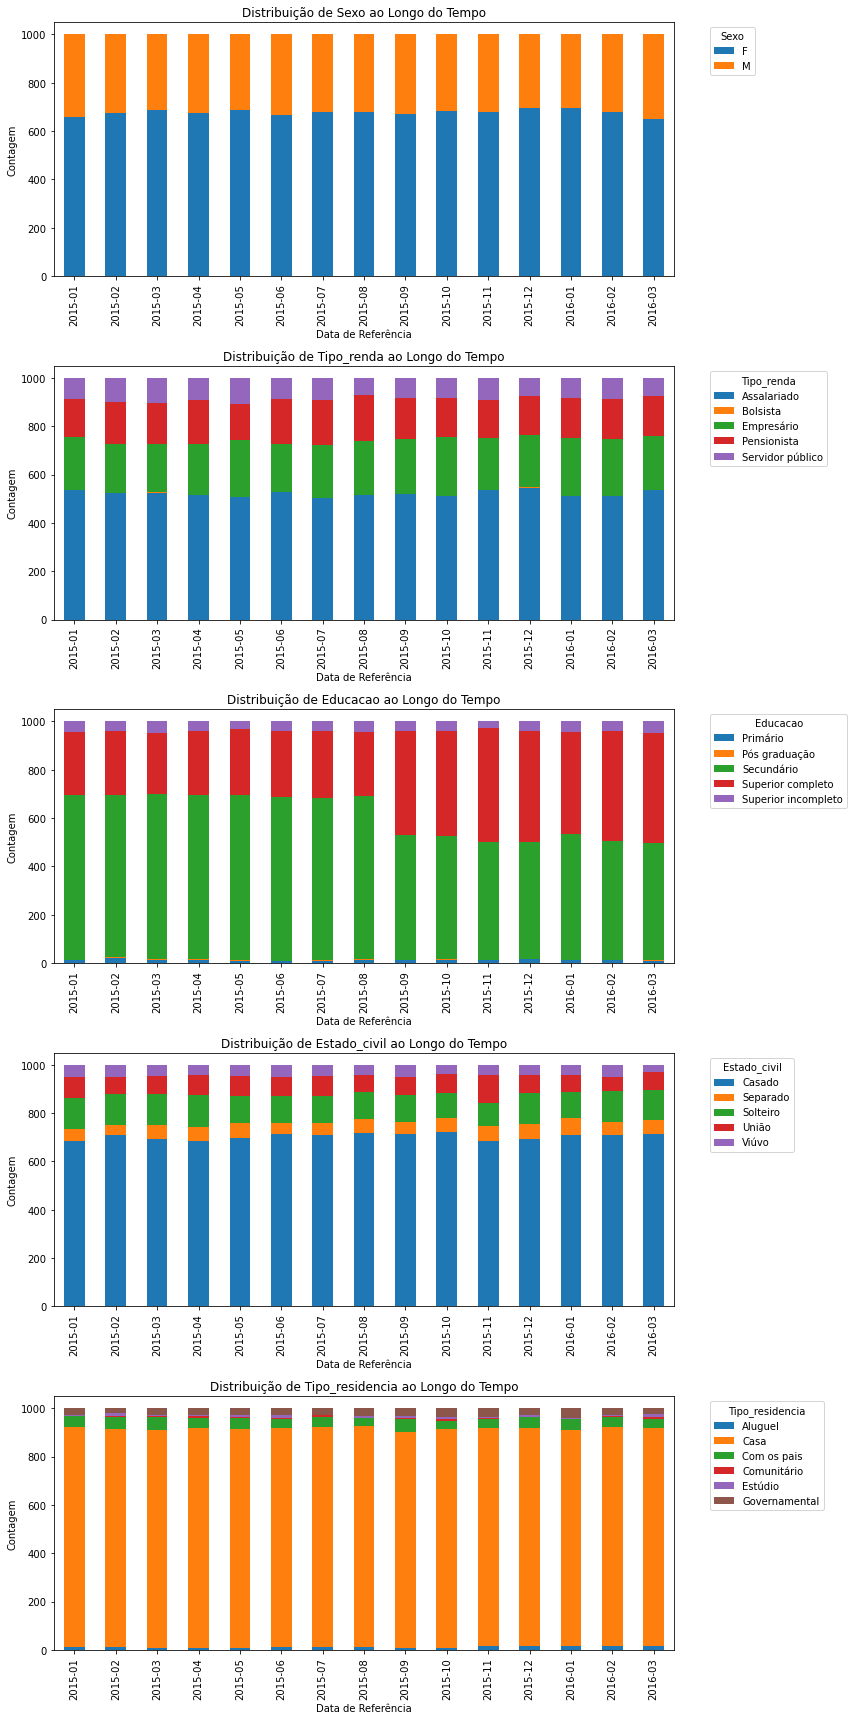

In [7]:
variaveis_qualitativas = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

fig, axes = plt.subplots(nrows=len(variaveis_qualitativas), ncols=1, figsize=(12, 24))

for i, var in enumerate(variaveis_qualitativas):
    
    data_grouped = df_renda.groupby([df_renda['data_ref'].dt.to_period('M'), var]).size().unstack().fillna(0)

    data_grouped.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var.capitalize()} ao Longo do Tempo')
    axes[i].set_xlabel('Data de Referência')
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title=var.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

A variação que chama a atenção acontece na variável 'educação', onde a partir de Setembro de 2015 a proporção de pessoas com superior completo cresce bastante.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

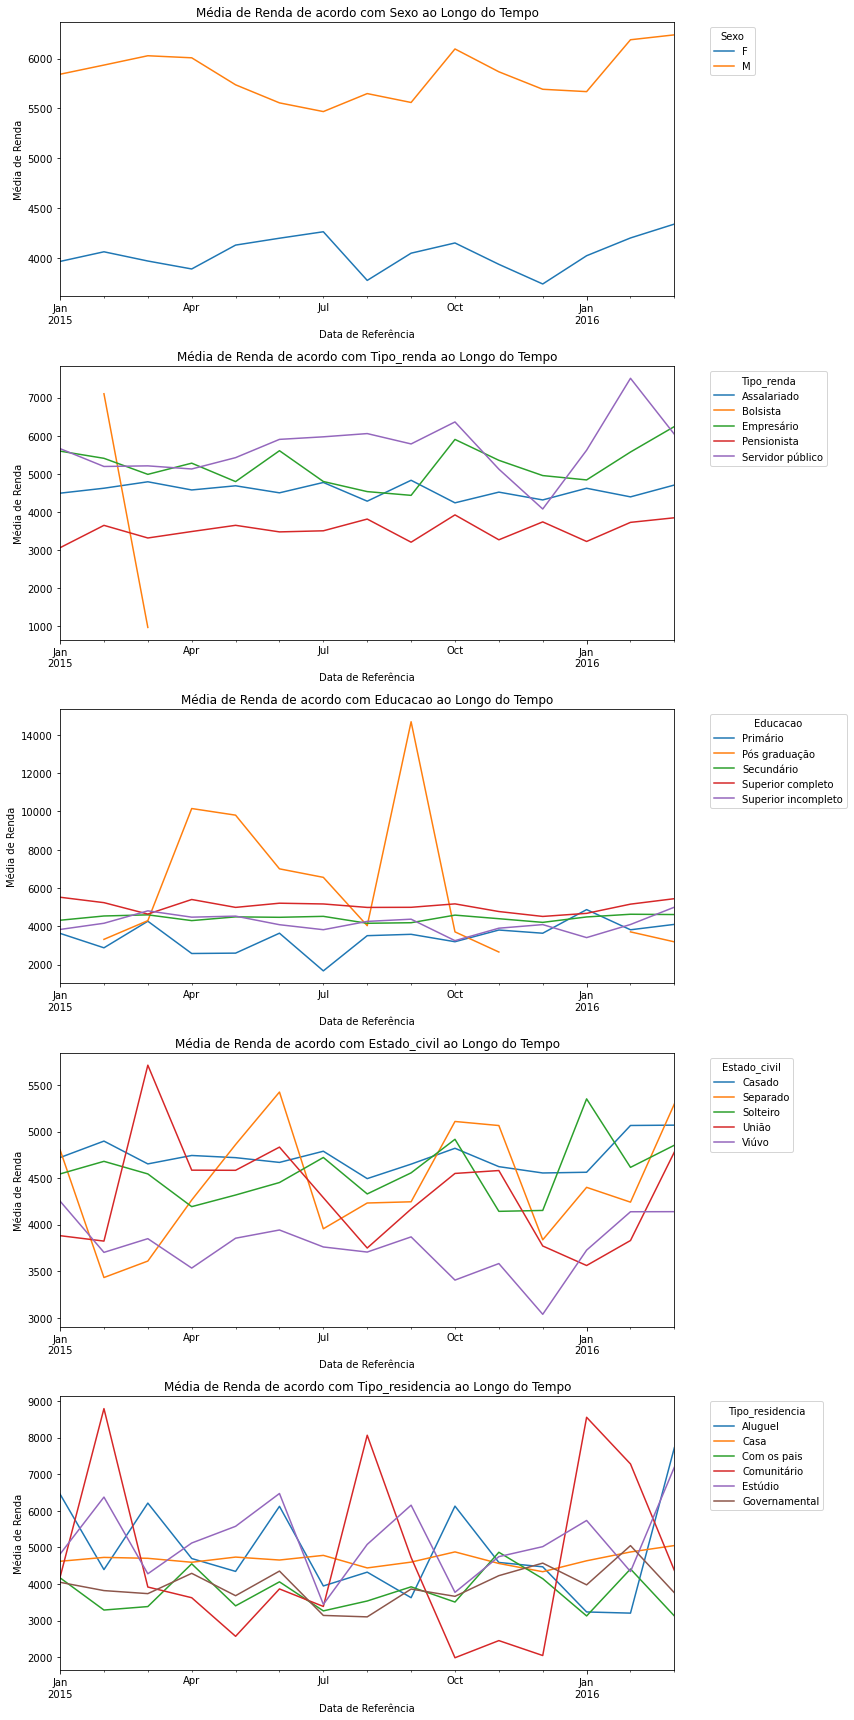

In [9]:
fig, axes = plt.subplots(nrows=len(variaveis_qualitativas), ncols=1, figsize=(12, 24))

for i, var in enumerate(variaveis_qualitativas):

    data_grouped = df_renda.groupby([df_renda['data_ref'].dt.to_period('M'), var])['renda'].mean().unstack()
    
    data_grouped.plot(kind='line', ax=axes[i])
    axes[i].set_title(f'Média de Renda de acordo com {var.capitalize()} ao Longo do Tempo')
    axes[i].set_xlabel('Data de Referência')
    axes[i].set_ylabel('Média de Renda')
    axes[i].legend(title=var.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Analisando graficamente, percebemos que algumas variáveis são mais estáveis que outras. A variável 'Sexo', por exemplo possui um comportamento que varia pouco ao longo do tempo, que facilita a modelagem. Por sua vez, a variável 'Tipo_Renda' também parece ser uma boa possibilidade para a realização de análises de modelagem, caso seja excluído o tipo 'bolsista', que, além de possuir uma variância mais drástica, possui poucas observações na base de dados. Algo parecido ocorre na variável 'Educacao', onde as pessoas com pós graduação possuem um comportamento que foge da normalidade. Dentre as demais, as variáveis 'Tipo_residencia' e 'estado_civil' possuem variância maior, e inclusive podemos perceber alguns outliers, principalmente na variável 'tipo_residencia', onde conseguimos ver 3 picos de renda em uma das categorias.